### 📶 MIMO, LTE ve 5G: Temel Kavramlar

#### 🧩 MIMO (Multiple-Input Multiple-Output) Nedir?

**MIMO**, kablosuz iletişimde hem gönderici (ör. baz istasyonu) hem de alıcı (ör. cep telefonu) tarafında birden fazla anten kullanılmasıdır. Bu teknoloji sayesinde:

- 📈 Aynı frekansta daha fazla veri iletilebilir.
- 📶 Sinyal kalitesi ve veri hızı artar.
- ❌ Parazit ve çok yollu yayılım (multipath fading) gibi olumsuzluklar azaltılabilir.

📌 **Örnek:** 2x2 MIMO sistemi, 2 gönderici ve 2 alıcı anteni içerir.

---

#### 🌐 LTE Nedir?

**LTE (Long Term Evolution)**, 4G mobil haberleşme standardıdır. Özellikleri:

- ⚡ Yüksek veri hızı (örneğin 50–100 Mbps).
- ⏱️ Düşük gecikme süresi.
- 📱 Ses, video ve veri hizmetlerini aynı anda iletebilme.

📌 LTE sistemleri, MIMO teknolojisini kullanarak bu hızlara ve kapasitelere ulaşır.

---

#### 🔄 LTE ve MIMO İlişkisi

- LTE, **MIMO teknolojisine entegre** edilmiştir.
- **Beamforming** ve **spatial multiplexing** gibi tekniklerle veri aktarımı optimize edilir.
- LTE sistemlerinde yaygın olarak **2x2**, **4x4**, hatta **8x8 MIMO** kullanılır.

---

#### 🚀 5G Nedir?

**5G**, LTE’nin devamı olan beşinci nesil mobil haberleşme teknolojisidir. Temel avantajları:

- 🚀 Çok yüksek veri hızı (1 Gbps+)
- ⚡ Ultra düşük gecikme süresi (1 ms altı)
- 🔗 Yüksek cihaz yoğunluğu (IoT için uygun)
- 🌐 Yeni frekans bantları (mmWave gibi)

---

#### 🔗 5G ve MIMO Bağlantısı

- 5G, **Massive MIMO** kullanır. Bu, baz istasyonunda **yüzlerce anten** anlamına gelir.
- Kullanıcıya özel **beamforming** teknikleriyle sinyaller yönlendirilir.
- Massive MIMO, 5G'nin yüksek kapasite, hız ve enerji verimliliği hedeflerini mümkün kılar.

---

📌 **Sonuç:** MIMO teknolojisi, hem LTE hem de 5G’nin temel yapı taşıdır ve günümüzün yüksek kapasiteli kablosuz ağlarının başarısında kritik rol oynar.


# 📘 Proje Girişi: Enerji Verimliliği için Soft-Cell Koordinasyonu

Bu çalışma, **"Massive MIMO and Small Cells: Improving Energy Efficiency by Optimal Soft-Cell Coordination"** başlıklı makaleye dayanmaktadır. Hızla artan kullanıcı sayısı ve kalite beklentileri karşısında klasik makro hücre mimarisi yetersiz kalmaktadır. Bu nedenle, hücre yoğunluğunu artırarak enerji verimliliğini yükseltmek amacıyla iki temel yaklaşım ele alınmaktadır:

1. **Massive MIMO (Çok Antenli Baz İstasyonları)**: Büyük anten dizileri kullanılarak kullanıcıya doğru odaklanmış enerji aktarımı sağlanır.
2. **Small Cell Access Points (SCA)**: Kullanıcılara daha yakın, düşük güçlü ek verici noktaları eklenerek kapsama alanı küçültülür ve sinyal zayıflaması azaltılır.

Makale bu iki yaklaşımı birleştirerek, enerji tüketimini azaltırken kullanıcıların **Quality-of-Service (QoS)** ihtiyaçlarını karşılayan bir sistem önerir. Kullanıcılar, baz istasyonu (BS) ve küçük hücrelerden (SCA) aynı anda sinyal alabilir. Bu **non-coherent multiflow transmission (çok vericili, senkronizasyonsuz aktarım)** yaklaşımı, karmaşık koherens gerektirmeden çoklu vericiden hizmet almayı sağlar.

### 🎯 Amaç:
Toplam güç tüketimini (yayın gücü + devre güçleri) minimize etmek; bu sırada her kullanıcıya en az belirlenen bir QoS sağlamak.

### 🛠️ Kullanılan Yöntemler:
- **Optimizasyon Temelli Çözüm**: SINR eşikleri ve güç kısıtlamaları altında toplam gücü minimize eden konveks bir optimizasyon problemi çözülür.
- **CVX (MATLAB) / CVXPY (Python)**: Konveks optimizasyon problemi bu araçlarla çözülür.
- **Çoklu Senaryo Simülasyonları**: Farklı anten sayılarına, QoS seviyelerine ve SCA konfigürasyonlarına göre enerji tüketimi analiz edilir.
- **Alternatif Olarak Reinforcement Learning (RL)**


## 🔧 Başlangıç ve Simülasyon Parametrelerinin Tanımlanması

Bu bölüm, makaledeki **Şekil 3**’ün yeniden üretimi için kullanılan temel simülasyon parametrelerini tanımlar. Söz konusu şekil, farklı baz istasyonu (NBS) ve küçük hücre erişim noktası (NSCA) sayıları altında ortalama toplam güç tüketimini göstermektedir. Tüm senaryolarda, kullanıcı başına **2 bit/s/Hz** olarak belirlenmiş sabit bir QoS (Quality of Service) kısıtı dikkate alınmıştır. Tanımlanan parametreler, makalenin **Bölüm IV – Sayısal Değerlendirmeler** kısmında sunulan LTE-benzeri sistem yapısını temel alır.

- **nbrOfRealizations**: Farklı kanal durumları altında ortalama sonuçları hesaplamak için kullanılacak kanal gerçekleştirim sayısıdır.
- **relaxPowerConstraintsIfNeeded**: Bazı kullanıcı yerleşimlerinin güç kısıtlamaları altında hizmet verilememesi durumunda, çözümün olanaklı kalması için güç sınırlarının gevşetilmesine izin verir.
- **nbrOfSubCarriers** ve **subcarrierBandwidth**: LTE sistemine benzer şekilde sistemin toplam alt taşıyıcı sayısı ve her birinin bant genişliğini belirler.
- **noiseFigure** ve **noiseFloordBm**: Alıcıdaki ek gürültü faktörünü (dB cinsinden) ve toplam gürültü taban seviyesini (dBm cinsinden) hesaplar.
- **Kt** ve **Kr**: Sistemdeki toplam verici (1 baz istasyonu + 4 küçük hücre erişim noktası) ve kullanıcı sayısını ifade eder.
- **QoSconstraints** ve **SINRconstraints**: Kullanıcı başına düşen hedef veri oranı (bit/s/Hz) ve bu hedefe karşılık gelen minimum SINR değeri (lineer ölçekte) belirlenir.
- **rng('shuffle')**: Simülasyonların her çalıştırıldığında farklı sonuçlar üretmesi için rastgele sayı üretecinin tohumunu sistem saatine göre ayarlar.

Bu parametreler, hem fiziksel sistem özelliklerini hem de optimizasyon probleminin sınırlarını tanımlar ve simülasyonun geri kalanının temelini oluşturur.


In [23]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cvxpy as cp
import mosek

# Simülasyon parametreleri
analyze = 0
nbr_of_realizations = 1  # Kanal gerçekleştirim sayısı

# Makro baz istasyonunun gücü yetmediği bazı durumlar olabilir,
# bu nedenle optimizasyonun çözülemeyeceği durumlarda gevşeme yapılır.
relax_power_constraints_if_needed = True

# LTE-benzeri sistemde alt taşıyıcı parametreleri
nbr_of_subcarriers = 600
subcarrier_bandwidth = 15e3  # Hz

# Gürültü seviyesi hesaplaması
noise_figure_db = 5  # dB
noise_floor_dbm = -174 + 10 * np.log10(subcarrier_bandwidth) + noise_figure_db  # dBm

# Verici ve kullanıcı sayıları
Kt = 5   # 1 BS + 4 SCA
Kr = 10  # 10 kullanıcı

# QoS hedefi (bit/s/Hz) ve karşılık gelen SINR (lineer)
QoS_constraint = 2
SINR_constraints = (2**QoS_constraint - 1) * np.ones((Kr, 1))

# Rastgele tohum (şansa bağlı kanal gerçekleştirimleri için)
np.random.seed()  # Python'da 'shuffle' eşdeğeri: sistem saatine göre


## 🛰️ Baz İstasyonu (BS) Parametrelerinin Tanımlanması

Bu bölümde, makro baz istasyonuna ait fiziksel ve kanal parametreleri tanımlanır. Bu parametreler makalenin **Tablo I** ve **Bölüm IV: Numerical Evaluations** kısmına karşılık gelir.

- **P_BS**: Baz istasyonunun alt taşıyıcı başına en fazla iletebileceği güç (mW cinsinden). Problem çözümünün mümkün olması için yeterince yüksek seçilir.
- **rho0_inv**: Güç yükselteçlerinin verimsizliğini gösteren çarpan (BS için). Bu değer küçüldükçe daha yüksek verim elde edilir.
- **circuitPowerBS**: Her bir antenin sabit devre güç tüketimi (189 mW toplam, alt taşıyıcı sayısına bölünerek normalize edilir).
- **minimalUserDistanceBS**: Kullanıcıların baz istasyonuna çok yakın yerleştirilmemesi için minimum mesafe sınırı (kilometre cinsinden).
- **NBScases**: Farklı simülasyon senaryoları için denenecek baz istasyonu anten sayıları. Şekil 3'te bu değerler yatay ekseni oluşturur.
- **pentrationlossdB**: Kullanıcıların kapalı alanda olduğu varsayımıyla uygulanan giriş kaybı (dB).
- **shadowFadingBS**: Makro baz istasyonu ile kullanıcılar arasındaki shadow fading sapmasının standart sapması (dB cinsinden).

Bu parametreler, simülasyonda baz istasyonunun kullanıcılarla olan kanal modellerini ve enerji tüketimini etkiler.


In [24]:
# Baz istasyonu parametreleri
P_BS = 66  # mW cinsinden, alt taşıyıcı başına maksimum iletim gücü
rho0_inv = 0.388  # BS güç amplifikatörü verimsizliği
circuit_power_BS = 189 / nbr_of_subcarriers  # Anten başına sabit devre gücü (mW)
minimal_user_distance_BS = 0.035  # km cinsinden minimum kullanıcı uzaklığı

# Farklı baz istasyonu anten sayıları senaryosu (Şekil 3 için)

NBS_cases = np.arange(20, 101, 10)

# Kanal propagasyon parametreleri (kapalı alan ve shadow fading)
penetration_loss_dB = 20  # dB cinsinden giriş kaybı
shadow_fading_BS = 7  # dB cinsinden shadow fading standart sapması


## 📡 Small Cell Access Points (SCA) Parametrelerinin Tanımlanması

Bu bölüm, küçük hücre erişim noktalarının (SCA'ların) kanal ve donanım parametrelerini içerir. SCA'lar kullanıcıya daha yakın konumlandırılarak enerji verimliliğini artırmayı hedefler. Parametreler makaledeki **Tablo I**, **Bölüm II: System Model** ve **Bölüm IV: Numerical Evaluations** ile ilişkilidir.

- **P_SCA**: Her alt taşıyıcı için bir SCA’nın maksimum iletim gücü (mW).
- **rhoj_inv**: SCA güç amplifikatörlerinin verimsizliği.
- **circuitPowerSCA**: Her bir anten için sabit devre güç tüketimi (mW).
- **minimalUserDistanceSCA**: Kullanıcının herhangi bir SCA’ya fiziksel olarak çok yaklaşmaması için belirlenen minimum mesafe (km).
- **NSCAcases**: Simülasyonda test edilecek farklı SCA anten sayısı konfigürasyonları (Şekil 3 için farklı senaryolar).
- **clusterSize**: Bir kullanıcının bir SCA’nın “kümesi” içinde sayılabilmesi için gereken maksimum mesafe (40 metre ≈ 0.04 km).
- **penetrationlossdB_incluster**: Kullanıcı bir kümenin içindeyse sinyale uygulanan giriş kaybı (dB).
- **penetrationlossdB_outcluster**: Kullanıcı küme dışında ise uygulanan giriş kaybı (dB).
- **shadowFadingSCA_incluster / outcluster**: Küme içindeki ve dışındaki kullanıcılar için shadow fading standart sapması (dB).

Bu parametreler, SCAların kullanıcıya olan mesafesine göre farklı kanal zayıflamaları ve shadow fading etkileri uygulanmasını sağlar.


In [25]:
# SCA parametreleri
P_SCA = 0.08  # mW cinsinden, alt taşıyıcı başına maksimum iletim gücü
rhoj_inv = 0.052  # SCA güç amplifikatörü verimsizliği
circuit_power_SCA = 5.6 / nbr_of_subcarriers  # Anten başına sabit devre gücü (mW)
minimal_user_distance_SCA = 0.003  # km cinsinden minimum kullanıcı uzaklığı

# SCA anten sayısı konfigürasyonları (Şekil 3 için)
# NSCA_cases = np.array([0, 1, 2, 3])
NSCA_cases = np.array([0, 1, 2, 3])

# Kullanıcı yerleşim kümeleri ve zayıflama parametreleri
cluster_size = 0.04  # km
penetration_loss_dB_incluster = 0   # dB
penetration_loss_dB_outcluster = 20  # dB

# Shadow fading sapmaları
shadow_fading_SCA_incluster = 7  # dB
shadow_fading_SCA_outcluster = 7  # dB


## 🌐 Simülasyon Ortamının Hazırlanması ve Kanal Gerçekleştirimleri

Bu bölümde simülasyon ortamı kurulmakta ve her kanal gerçekleştiriminde kullanıcı konumları oluşturulmaktadır. Ayrıca, her senaryo için kanal matrisleri, shadow fading değerleri ve iletim gücü sınırları hazırlanır.

### 📍 Transmitter ve Kullanıcı Yerleşimi
- SCAlar, 0.5 km yarıçaplı bir çember üzerine eşit aralıklı yerleştirilmiştir.
- Kullanıcılar:
  - Kr-Kt+1 tanesi makro hücre içinde rastgele yerleştirilir.
  - Diğer Kt-1 kullanıcı, her biri bir SCA'nın kümesi içinde (40 m yarıçap) konumlandırılır.
- Kullanıcılar, tüm vericilere olan uzaklığı kontrol edilerek minimum mesafe koşulunu sağlamazsa yeni yerleştirme yapılır.

### 📡 Kanal Gerçekleştirimleri ve Gölgeleme (Shadow Fading)
- `Huncorr`: Kullanıcı başına tüm antenlere ait kompleks kanal matrisleri (Rayleigh fading).
- `shadowFadingRealizations`: Her kullanıcı-verici çifti için gölgeleme etkisi (normal dağılımlı).

### 🔄 Senaryolar ve Anten Yapılandırmaları
- Farklı BS anten sayıları (`NBScases`) ve SCA anten sayıları (`NSCAcases`) denenir.
- Her senaryoda:
  - Toplam anten sayısı hesaplanır.
  - Kanal korelasyonu (makro BS için Eq. 34) uygulanır.
  - Pathloss, shadow fading ve penetration loss etkilerine göre kanal matrisleri normalize edilir.
  
### 🔋 Güç Kısıtları ve Optimizasyon Hazırlığı
- Her anten için ayrı ayrı güç sınırlarını temsil eden matrisler oluşturulur (`Q` ve `Qsqrt`).
- BS ve SCAlar için normalize edilmiş güç sınırları `q` vektöründe tutulur.

### ✅ Optimizasyon (Şimdilik Placeholder)
- `function_QoSproblem_singleBS` ve `function_QoSproblem_relaxation` fonksiyonları çağrılarak her konfigürasyon için optimal beamforming çözümleri alınır.
- Her bir çözüm için:
  - Toplam güç hesaplanır.
  - Hangi antenin hangi kullanıcıya hizmet verdiği `optimalUserAllocation` matrisinde saklanır.

> Bu kısım, makaledeki **Bölüm IV - Numerical Evaluations** ve **Şekil 3**'ün temelini oluşturur.


In [26]:
def function_QoSproblem_singleBS(H, SINRconstraints, Qsqrt, q):
    Kr, N = H.shape

    W = cp.Variable((N, Kr), complex=True)
    objective = cp.Minimize(cp.norm(W, "fro"))
    constraints = []

    for k in range(Kr):
        hk = H[k, :]
        signal = cp.real(hk @ W[:, k])
        interference_vector = cp.hstack([cp.Constant([1.0]), hk @ W])
        interference = cp.norm(interference_vector, 2)

        constraints.append(signal * cp.sqrt(1 + SINRconstraints[k]) >= cp.sqrt(SINRconstraints[k]) * interference)
        constraints.append(cp.imag(hk @ W[:, k]) == 0)

    if Qsqrt is not None and q is not None:
        L = len(q)
        for l in range(L):
            Ql = Qsqrt[:, :, l]
            constraints.append(cp.norm(Ql @ W, 'fro') <= cp.sqrt(q[l]))

    prob = cp.Problem(objective, constraints)
    try:
        prob.solve(solver=cp.MOSEK, verbose=True, mosek_params={"MSK_DPAR_INTPNT_TOL_REL_GAP": 1e-3})
    except:
        return None, np.nan

    if prob.status == "optimal" and W.value is not None:
        Wsolution = np.copy(W.value)
        transmitpower = np.linalg.norm(Wsolution, 'fro')**2
    else:
        Wsolution = None
        transmitpower = np.nan

    return Wsolution, transmitpower


def function_QoSproblem_relaxation(H, Nantennas, SINRconstraints, Q, q):
    Kr, N = H.shape
    Kt = len(Nantennas)
    L = len(q)

    antenna_inds = np.concatenate([[0], np.cumsum(Nantennas)])
    HH = np.zeros((N, N, Kr), dtype=complex)
    for j in range(Kt):
        for k in range(Kr):
            start = antenna_inds[j]
            end = antenna_inds[j+1]
            h_jk = H[k, start:end]
            HH[start:end, start:end, k] = np.outer(h_jk.conj(), h_jk)

    W = [cp.Variable((N, N), hermitian=True) for _ in range(Kr)]
    constraints = []
    total_W = sum(W)

    for k in range(Kr):
        lhs = cp.real(cp.trace(W[k] @ HH[:, :, k])) * (1 + SINRconstraints[k])
        rhs = SINRconstraints[k] * (1 + cp.real(cp.trace(total_W @ HH[:, :, k])))
        constraints.append(lhs >= rhs)
        constraints.append(W[k] >> 0)

    for l in range(L):
        Ql = Q[:, :, l]
        constraints.append(cp.real(cp.trace(Ql @ total_W)) <= q[l])

    objective = cp.Minimize(cp.real(cp.trace(total_W)))
    prob = cp.Problem(objective, constraints)

    try:
        prob.solve(solver=cp.MOSEK, verbose=True, mosek_params={"MSK_DPAR_INTPNT_TOL_REL_GAP": 1e-3})
    except:
        return None, np.nan, None

    if any(Wk.value is None for Wk in W):
        return None, np.nan, None

    Wsolution = np.stack([Wk.value for Wk in W], axis=2)
    transmitpower = np.real(np.trace(np.sum(Wsolution, axis=2)))

    BSallocation = np.zeros((Kt, Kr))
    for k in range(Kr):
        for j in range(Kt):
            start = antenna_inds[j]
            end = antenna_inds[j+1]
            W_jk = Wsolution[start:end, start:end, k]
            H_jk = HH[start:end, start:end, k]
            signal_power = np.real(np.trace(H_jk @ W_jk))
            BSallocation[j, k] = signal_power > 1e-4

    return Wsolution, transmitpower, BSallocation


def function_QoSproblem_multiflowRZF(H, Nantennas, SINRconstraints, Q, q):
    Kr, N = H.shape
    Kt = len(Nantennas)
    L = len(q)

    antenna_inds = np.concatenate([[0], np.cumsum(Nantennas)])
    max_sinr = max(SINRconstraints)

    g = np.zeros((Kt, Kr, Kr))   # g[j,i,k]: Tx j -> User i affects User k
    QQ = np.zeros((Kt, Kr, L))
    Wsolution = np.zeros((N, Kr), dtype=complex)

    # Adım 1: RZF beamforming yönlerini hesapla
    for j in range(Kt):
        for i in range(Kr):
            idx = slice(antenna_inds[j], antenna_inds[j + 1])
            Hj = H[np.arange(Kr) != i, idx]
            Hi = H[i, idx]
            Qinv = np.diag(Kr / q[idx] / max_sinr)

            A = Hj.conj().T @ Hj + Qinv
            w = np.linalg.solve(A, Hi.conj().T)
            w /= np.linalg.norm(w)
            Wsolution[idx, i] = w

            for k in range(Kr):
                g[j, i, k] = np.abs(H[k, idx] @ w) ** 2
            for l in range(L):
                Qjl = Q[idx, idx, l]
                QQ[j, i, l] = np.real(w.conj().T @ Qjl @ w)

    # CVX tabanlı güç tahsisi
    P = cp.Variable((Kt, Kr), nonneg=True)
    constraints = []

    for k in range(Kr):
        lhs = cp.sum(cp.multiply(g[:, k, k], P[:, k])) * (1 + SINRconstraints[k])
        rhs = SINRconstraints[k] * (1 + cp.sum(cp.multiply(g[:, :, k], P)))
        constraints.append(lhs >= rhs)

    for l in range(L):
        constraints.append(cp.sum(cp.multiply(QQ[:, :, l], P)) <= q[l])

    objective = cp.Minimize(cp.sum(P))
    prob = cp.Problem(objective, constraints)

    try:
        prob.solve(solver=cp.MOSEK, verbose=True, mosek_params={"MSK_DPAR_INTPNT_TOL_REL_GAP": 1e-3})
    except:
        return None, np.nan, None

    if P.value is None:
        return None, np.nan, None

    P_opt = P.value
    totalpower = np.sum(P_opt)

    BSallocation = np.zeros((Kt, Kr))
    for j in range(Kt):
        for i in range(Kr):
            idx = slice(antenna_inds[j], antenna_inds[j + 1])
            Wsolution[idx, i] *= np.sqrt(P_opt[j, i])
            BSallocation[j, i] = g[j, i, i] * P_opt[j, i] > 1e-4

    return Wsolution, totalpower, BSallocation


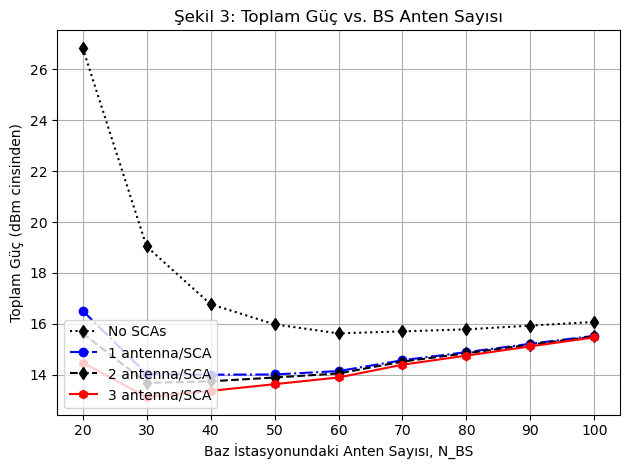

In [27]:
# Simülasyon ortamının hazırlanması
radius = 0.5  # km
BS_locations = np.array([
    [0, 0],
    [radius / 2, radius / 2],
    [radius / 2, -radius / 2],
    [-radius / 2, -radius / 2],
    [-radius / 2, radius / 2]
])
minimal_user_distances = np.concatenate(
    ([minimal_user_distance_BS], [minimal_user_distance_SCA] * (Kt - 1))
)

total_power = np.zeros((len(NBS_cases), len(NSCA_cases), nbr_of_realizations))
optimal_user_allocation = np.zeros((Kt, Kr, len(NBS_cases), len(NSCA_cases), nbr_of_realizations))

max_num_antennas = max(NBS_cases) + (Kt - 1) * max(NSCA_cases)
H_uncorr = (np.random.randn(Kr, max_num_antennas, nbr_of_realizations) +
            1j * np.random.randn(Kr, max_num_antennas, nbr_of_realizations)) / np.sqrt(2)
shadow_fading_realizations = np.random.randn(Kt, Kr, nbr_of_realizations)


if(analyze):
    for iter in range(nbr_of_realizations):
        print(f"Realization {iter + 1}/{nbr_of_realizations}")

        # Kullanıcı yerleşimleri
        distances = np.sqrt(np.random.rand(Kr))
        angles = 2 * np.pi * np.random.rand(Kr)
        MS_locations = np.zeros((Kr, 2))

        for j in range(Kt):
            if j == 0:
                count = Kr - Kt + 1
                MS_locations[0:count, :] = radius * distances[:count, None] * np.column_stack(
                    (np.cos(angles[:count]), np.sin(angles[:count]))
                )
            else:
                pos_idx = Kr - Kt + j
                pos = cluster_size * distances[pos_idx] * np.array(
                    [np.cos(angles[pos_idx]), np.sin(angles[pos_idx])]
                )
                while np.linalg.norm(pos) < minimal_user_distances[j]:
                    pos = cluster_size * np.sqrt(np.random.rand()) * np.array(
                        [np.cos(angles[pos_idx]), np.sin(angles[pos_idx])]
                    )
                MS_locations[pos_idx, :] = BS_locations[j, :] + pos

        # Minimum mesafe kontrolü
        for k in range(Kr):
            while np.min(np.linalg.norm(BS_locations - MS_locations[k, :], axis=1) - minimal_user_distances) < 0:
                r = radius * np.sqrt(np.random.rand())
                theta = 2 * np.pi * np.random.rand()
                MS_locations[k, :] = r * np.array([np.cos(theta), np.sin(theta)])

        for scenario, N_bs in enumerate(NBS_cases):
            N_antennas = np.array([N_bs] + [max(NSCA_cases)] * (Kt - 1))
            N_total = np.sum(N_antennas)
            H = np.zeros((Kr, N_total), dtype=complex)
            H[:, :N_bs] = H_uncorr[:, :N_bs, iter]
            offset = max(NBS_cases)
            for j in range(Kt - 1):
                start = offset + j * max(NSCA_cases)
                end = start + max(NSCA_cases)
                H[:, N_bs + j * max(NSCA_cases):N_bs + (j + 1) * max(NSCA_cases)] = H_uncorr[:, start:end, iter]

            antenna_inds = np.concatenate(([0], np.cumsum(N_antennas)))

            # Makro BS için korelasyon matrisi
            num_clusters = int(N_antennas[0] / 2)
            uniform_angles = -np.pi / 2 + np.pi * np.arange(1, num_clusters + 1) / num_clusters
            omega = 0.3
            A = np.exp(-1j * 2 * np.pi * omega * np.outer(np.arange(N_antennas[0]), np.sin(uniform_angles))) / np.sqrt(num_clusters)
            A = np.hstack([A, np.zeros((N_antennas[0], num_clusters))])

            # Kanalları normalize et ve shadow fading, pathloss ekle
            loss_over_noise = np.zeros((Kt, Kr))
            for k in range(Kr):
                dists = np.linalg.norm(BS_locations - MS_locations[k, :], axis=1)
                for j in range(Kt):
                    if j == 0:
                        path_loss = 128.1 + 37.6 * np.log10(dists[j]) + shadow_fading_BS * shadow_fading_realizations[j, k, iter] + noise_floor_dbm + penetration_loss_dB
                        loss_over_noise[j, k] = 10 ** (path_loss / 10)
                        idx = slice(antenna_inds[j], antenna_inds[j + 1])
                        H[k, idx] = (H[k, idx] @ A.conj().T) * np.sqrt(rho0_inv / loss_over_noise[j, k])
                    else:
                        if dists[j] <= cluster_size:
                            path_loss = 127 + 30 * np.log10(dists[j]) + shadow_fading_SCA_incluster * shadow_fading_realizations[j, k, iter] + noise_floor_dbm + penetration_loss_dB_incluster
                        else:
                            path_loss = 128.1 + 37.6 * np.log10(dists[j]) + shadow_fading_SCA_outcluster * shadow_fading_realizations[j, k, iter] + noise_floor_dbm + penetration_loss_dB_outcluster
                        loss_over_noise[j, k] = 10 ** (path_loss / 10)
                        idx = slice(antenna_inds[j], antenna_inds[j + 1])
                        H[k, idx] = H[k, idx] * np.sqrt(rhoj_inv / loss_over_noise[j, k])

            # Güç kısıtları
            L = N_total
            Q = np.zeros((N_total, N_total, L))
            Qsqrt = np.zeros((N_total, N_total, L))
            for j in range(L):
                Q[j, j, j] = 1
                Qsqrt[j, j, j] = 1

            q = np.concatenate([
                (P_BS / rho0_inv) * np.ones(N_antennas[0]),
                (P_SCA / rhoj_inv) * np.ones(max(NSCA_cases) * (Kt - 1))
            ])

            # Optimizasyon çözümleri
            for m, N_sca in enumerate(NSCA_cases):
                if m == 0:
                    # Sadece makro BS ile çözüm
                    H_BS = H[:, :N_antennas[0]]
                    Qsqrt_BS = Qsqrt[:N_antennas[0], :N_antennas[0], :N_antennas[0]]
                    q_BS = q[:N_antennas[0]]

                    Wsolution_BSonly, transmit_power_BSonly = function_QoSproblem_singleBS(
                        H_BS, SINR_constraints, Qsqrt_BS, q_BS
                    )

                    if relax_power_constraints_if_needed and np.isnan(transmit_power_BSonly):
                        Wsolution_BSonly, transmit_power_BSonly = function_QoSproblem_singleBS(
                            H_BS, SINR_constraints, None, None
                        )

                    total_power[scenario, m, iter] = N_antennas[0] * circuit_power_BS + transmit_power_BSonly
                    optimal_user_allocation[0, :, scenario, m, iter] = 1

                
                else:
                    # Makro BS + SCA'lar
                    N_SCA_total = N_sca * (Kt - 1)
                    N_current = N_antennas[0] + N_SCA_total

                    H_current = np.zeros((Kr, N_current), dtype=complex)
                    H_current[:, :N_antennas[0]] = H[:, :N_antennas[0]]
                    for j in range(1, Kt):
                        start_H = N_antennas[0] + (j - 1) * N_sca
                        start_H_uncorr = N_antennas[0] + (j - 1) * max(NSCA_cases)
                        H_current[:, start_H:start_H + N_sca] = H[:, start_H_uncorr:start_H_uncorr + N_sca]

                    N_antennas_current = np.concatenate([[N_antennas[0]], [N_sca] * (Kt - 1)])
                    Q_current = Q[:N_current, :N_current, :N_current]
                    q_current = q[:N_current]

                    Wsolution, transmit_power_BS_SCA, BS_allocation = function_QoSproblem_relaxation(
                        H_current, N_antennas_current, SINR_constraints, Q_current, q_current
                    )

                    if relax_power_constraints_if_needed and np.isnan(transmit_power_BS_SCA):
                        Q_relaxed = Q[:N_current, :N_current, N_antennas[0]:N_current]
                        q_relaxed = q[N_antennas[0]:N_current]

                        Wsolution, transmit_power_BS_SCA, BS_allocation = function_QoSproblem_relaxation(
                            H_current, N_antennas_current, SINR_constraints, Q_relaxed, q_relaxed
                        )

                    total_power[scenario, m, iter] = (
                        N_antennas[0] * circuit_power_BS +
                        (Kt - 1) * N_sca * circuit_power_SCA +
                        transmit_power_BS_SCA
                    )

                    optimal_user_allocation[:, :, scenario, m, iter] = BS_allocation
    totalpower_average_fig3 = np.mean(total_power, axis=2)
    # dBm'e dönüştürülür
    totalpower_average_dBm = 10 * np.log10(totalpower_average_fig3)
    plt.figure()
    markers = ['kd:', 'bo-.', 'kd--', 'rh-']
    labels = ['No SCAs', '1 antenna/SCA', '2 antenna/SCA', '3 antenna/SCA']

    for i, label in enumerate(labels):
        plt.plot(NBS_cases, totalpower_average_dBm[:, i], markers[i], label=label)

    plt.xlabel("Baz İstasyonundaki Anten Sayısı, N_BS")
    plt.ylabel("Toplam Güç (dBm cinsinden)")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.title("Şekil 3: Toplam Güç vs. BS Anten Sayısı")
    plt.tight_layout()
    plt.show()

else:
    data_fig3 = scipy.io.loadmat("massive-MIMO-small-cells-master/figure3.mat")
    totalpower_average_fig3 = data_fig3["totalpower_average"]
    totalpower_average_dBm = 10 * np.log10(totalpower_average_fig3)
    plt.figure()
    markers = ['kd:', 'bo-.', 'kd--', 'rh-']
    labels = ['No SCAs', '1 antenna/SCA', '2 antenna/SCA', '3 antenna/SCA']

    for i, label in enumerate(labels):
        plt.plot(NBS_cases, totalpower_average_dBm[:, i], markers[i], label=label)

    plt.xlabel("Baz İstasyonundaki Anten Sayısı, N_BS")
    plt.ylabel("Toplam Güç (dBm cinsinden)")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.title("Şekil 3: Toplam Güç vs. BS Anten Sayısı")
    plt.tight_layout()
    plt.show()


## 📊 Enerji Tüketiminin QoS Kısıtına Göre Analizi

Bu bölümde makalede yer alan **Şekil 4**’ün yeniden üretimi için simülasyon parametreleri tanımlanır. Söz konusu şekil farklı QoS kısıtları için farklı beamforming yöntemlerini kıyaslamaktadır.

- **Amaç**: Farklı QoS kısıtları (bit/s/Hz) altında toplam enerji tüketiminin karşılaştırılması.
- **QoS_values**: 1 ile 4 bit/s/Hz arasında değişen 7 farklı QoS seviyesi.
- **nbr_of_realizations**: Her QoS seviyesi için 100 farklı kanal gerçekleştirim senaryosu çalıştırılır.
- **Karşılaştırılan 3 beamforming yöntemi**:
  1. **Optimal: Only BS** → Sadece makro baz istasyonu ile optimizasyon.
  2. **Proposed Low-Complexity** → Yaklaşık çözüm sunan düşük karmaşıklıklı beamforming (örneğin RZF + güç tahsisi).
  3. **Optimal: Spatial Soft-Cell** → Makro BS ve SCAların ortak optimizasyonuyla elde edilen optimum çözüm.
- **Power Constraint Gevşetme**: Bazı kullanıcı yerleşimlerinde optimizasyon problemi çözülemeyebilir. Bu durumda, çözümün mümkün kalması için baz istasyonu güç sınırları gevşetilebilir.
- **LTE-benzeri parametreler**: 600 alt taşıyıcı, 15 kHz bant genişliği, 5 dB alıcı gürültü faktörü ile sistem yapılandırılmıştır.
- **SINR_constraints**: 2 bit/s/Hz hedef QoS için her kullanıcıya eşit SINR değeri atanır.

> Not: Kanal gerçekleştirimleri rastgele oluşturulduğundan, sonuçlar makaledekilerle birebir aynı olmayabilir.


In [28]:
# QoS kısıtları (bit/s/Hz cinsinden)
QoS_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4])

# Kanal gerçekleştirim sayısı
nbr_of_realizations = 100

# Simüle edilecek beamforming yöntem sayısı (örneğin: BS-only, RL, optimal)
nbr_of_schemes = 3

# Baz istasyonu gücünün yetmediği durumda kısıtların gevşetilmesi
relax_power_constraints_if_needed = True

# LTE-benzeri sistem parametreleri
nbr_of_subcarriers = 600
subcarrier_bandwidth = 15e3  # Hz

# Gürültü seviyesi
noise_figure_db = 5  # dB
noise_floor_dbm = -174 + 10 * np.log10(subcarrier_bandwidth) + noise_figure_db  # dBm

# Verici ve kullanıcı sayıları
Kt = 5   # 1 BS + 4 SCA
Kr = 10  # 10 kullanıcı

# Hedef QoS değeri ve karşılık gelen SINR (lineer ölçekte)
QoS_constraint_reference = 2  # bit/s/Hz
SINR_constraints = (2**QoS_constraint_reference - 1) * np.ones((Kr, 1))

# Rastgelelik için sistem saatine dayalı seed
np.random.seed()  # (rng('shuffle') eşdeğeri)


## 🛰️ Makro Baz İstasyonu (BS) Parametreleri

Bu bölümde, Şekil 4 simülasyonlarında kullanılan makro baz istasyonuna ait fiziksel ve kanal parametreleri tanımlanır.

- **P_BS**: BS’nin her alt taşıyıcı başına iletebileceği maksimum güç (mW). Çözümün her durumda mümkün olması için bu değer yeterince büyük seçilmelidir.
- **rho0_inv**: BS güç amplifikatörlerinin verimsizliği (düşük değer daha yüksek verimlilik anlamına gelir).
- **circuitPowerBS**: Her bir anten için sabit devre güç tüketimi (600 alt taşıyıcıya bölünmüş toplam 189 mW).
- **minimalUserDistanceBS**: Kullanıcıların baz istasyonuna çok yakın yerleştirilmemesi için belirlenen minimum mesafe (35 metre).
- **N_BS**: Makro baz istasyonundaki anten sayısı (50 anten).
- **penetrationlossdB**: Kullanıcıların kapalı alanda olduğu varsayımıyla uygulanan 20 dB’lik giriş kaybı.
- **shadowFadingBS**: Kullanıcılar ile makro BS arasındaki gölgeleme etkisinin standart sapması (7 dB).

Bu parametreler, kanal zayıflama modeli ve güç tüketimi hesaplamaları için gereklidir.


In [29]:
# Makro Baz İstasyonu parametreleri
P_BS = 66  # mW cinsinden, alt taşıyıcı başına maksimum iletim gücü
rho0_inv = 0.388  # BS güç amplifikatörü verimsizliği
circuit_power_BS = 189 / nbr_of_subcarriers  # Anten başına sabit devre gücü (mW)
minimal_user_distance_BS = 0.035  # km cinsinden minimum kullanıcı uzaklığı

# Anten sayısı
N_BS = 50  # Makro baz istasyonundaki anten sayısı

# Kanal propagasyon parametreleri
penetration_loss_dB = 20  # Giriş kaybı (dB)
shadow_fading_BS = 7  # Shadow fading standart sapması (dB)


## 📡 Small Cell Access Points (SCA) ve Anten Yapılandırması

Bu bölümde, küçük hücre erişim noktalarına (SCA) ait parametreler tanımlanır. SCA'lar, kullanıcıya daha yakın ve düşük güçlü vericiler olup enerji verimliliğini artırmayı amaçlar. Ayrıca sistemdeki toplam anten yapılandırması da burada hesaplanır.

- **P_SCA**: SCA başına alt taşıyıcı bazında maksimum iletim gücü (0.08 mW).
- **rhoj_inv**: SCA güç amplifikatörlerinin verimsizliği.
- **circuitPowerSCA**: SCA anten başına sabit devre güç tüketimi (600 alt taşıyıcıya bölünmüş 5.6 mW).
- **minimalUserDistanceSCA**: Kullanıcının bir SCA’ya fiziksel olarak çok yaklaşmaması için belirlenen minimum mesafe (3 metre).
- **N_SCA**: Her bir SCA’daki anten sayısı (2).
- **clusterSize**: Bir kullanıcının bir SCA’nın “kümesi” içinde sayılması için gereken maksimum mesafe (40 m).
- **pentrationlossdB_incluster / outcluster**: Kullanıcının bir kümeye yakınlığına göre uygulanan giriş kaybı.
- **shadowFadingSCA_incluster / outcluster**: Gölgeleme etkisinin standart sapması (dB).
- **Nantennas**: Her vericideki anten sayılarının vektörü (1 BS + 4 SCA).
- **N**: Toplam anten sayısı (sistemdeki tüm vericilerin antenlerinin toplamı).
- **antennaInds**: Her vericinin anten indeks aralığını gösteren vektör (optimizasyon matrislerini parçalara ayırmak için kullanılır).


In [30]:
# SCA parametreleri
P_SCA = 0.08  # mW cinsinden, alt taşıyıcı başına maksimum iletim gücü
rhoj_inv = 0.052  # SCA güç amplifikatörü verimsizliği
circuit_power_SCA = 5.6 / nbr_of_subcarriers  # Anten başına sabit devre gücü (mW)
minimal_user_distance_SCA = 0.003  # km cinsinden minimum kullanıcı uzaklığı

# Her SCA'nın anten sayısı
N_SCA = 2

# Kanal propagasyon parametreleri
cluster_size = 0.04  # km
penetration_loss_dB_incluster = 0   # dB
penetration_loss_dB_outcluster = 20  # dB
shadow_fading_SCA_incluster = 7  # dB
shadow_fading_SCA_outcluster = 7  # dB

# Anten yapılandırması
Nantennas = np.concatenate([[N_BS], N_SCA * np.ones(Kt - 1, dtype=int)])  # Her verici için anten sayısı
N = np.sum(Nantennas)  # Toplam anten sayısı
antenna_inds = np.concatenate([[0], np.cumsum(Nantennas)])  # Her vericinin anten aralığı başlangıç-bitiş indeksleri


## 🌐 Simülasyon Ortamının Kurulması, Güç Kısıtları ve Kanal Gerçekleştirimleri

Bu bölümde, simülasyon ortamı oluşturularak aşağıdaki işlemler gerçekleştirilir:

### 🛰️ Verici Konumları ve Kullanıcı Uzaklıkları
- SCAlar, 0.5 km yarıçaplı çember üzerine simetrik olarak yerleştirilir.
- BS ve SCA konumları `BSlocations` matrisinde tutulur.
- Her kullanıcı, bağlı olduğu vericiye belirli bir minimum mesafede yerleştirilir (`minimalUserDistances`).

### 🔋 Güç Kısıtları (Per-Antenna)
- Her anten için maksimum iletim gücü, `q` vektöründe tutulur.
- Bu kısıtlar, optimizasyon problemlerine uygun olacak şekilde `Q` ve `Qsqrt` matrisleriyle tanımlanır (her biri 1 olan diyagonal matrisler).
- `P_BS` ve `P_SCA`, sırasıyla BS ve SCA antenleri için normalize edilerek güç kısıtlarına dönüştürülür.

### 📡 Kanal ve Gölgeleme Gerçekleştirimleri
- `H`: Kanal matrisleri (Kr × N × realization), Rayleigh fading olarak modellenir.
- `shadowFadingRealizations`: Her kullanıcı-verici çifti için gölgeleme sapmaları, normal dağılımlı rastgele sayılardır.

### 📍 Kullanıcı Konumlandırması
- Kullanıcılar, hücre merkezinden 0.5 km’ye kadar rastgele yerleştirilir.
- Uzaklıklar karekök alınarak düzgün (uniform) dağılıma dönüştürülür.
- Açılar [0, 2π) arasında rastgele seçilir.


In [31]:
# Simülasyon ortamı
radius = 0.5  # km
BS_locations = np.array([
    [0, 0],
    [radius / 2, radius / 2],
    [radius / 2, -radius / 2],
    [-radius / 2, -radius / 2],
    [-radius / 2, radius / 2]
])  # 1 BS + 4 SCA

minimal_user_distances = np.concatenate(
    [[minimal_user_distance_BS], [minimal_user_distance_SCA] * (Kt - 1)]
)

# Güç kısıtları: her anten için ayrı ayrı
L = N  # Anten sayısı kadar kısıt
Q = np.zeros((N, N, L))
Qsqrt = np.zeros((N, N, L))

for j in range(L):
    Q[j, j, j] = 1
    Qsqrt[j, j, j] = 1

# Normalize edilmiş güç sınırları (her anten için)
q = np.concatenate([
    (P_BS / rho0_inv) * np.ones(N_BS),
    (P_SCA / rhoj_inv) * np.ones(N_SCA * (Kt - 1))
])

# Enerji sonuçlarını ve kullanıcı tahsisatlarını saklayacak matrisler
total_power = np.zeros((len(QoS_values), nbr_of_schemes, nbr_of_realizations))
optimal_user_allocation = np.zeros((Kt, Kr, len(QoS_values), nbr_of_schemes, nbr_of_realizations))

# Kanal gerçekleştirimleri (Rayleigh fading)
H = (np.random.randn(Kr, N, nbr_of_realizations) +
     1j * np.random.randn(Kr, N, nbr_of_realizations)) / np.sqrt(2)

# Shadow fading değerleri (normal dağılımlı)
shadow_fading_realizations = np.random.randn(Kt, Kr, nbr_of_realizations)

# Kullanıcı konumlandırması: mesafeler ve açılar (uniform dağılım)
distance_normalized = np.sqrt(np.random.rand(Kr, nbr_of_realizations))  # [0, 1] karekökü
angles = 2 * np.pi * np.random.rand(Kr, nbr_of_realizations)  # [0, 2π)


## 👤 Kullanıcı Konumlandırması ve Kanal Renormalizasyonu

Bu adımda her kanal gerçekleştirim döngüsü için aşağıdaki işlemler yapılır:

### 👣 Kullanıcı Konumlandırma
- **Kr−Kt+1 kullanıcı**, hücre içine rastgele dağıtılır.
- **Kt−1 kullanıcı**, her biri kendine ait bir SCA'nın kümesi içinde yerleştirilir (maksimum 40 m mesafede).
- Her kullanıcı, bağlı olduğu tüm vericilere olan minimum mesafe koşulunu sağlamıyorsa yeniden konumlandırılır.

### 🧱 Kanal Korelasyonu (BS için)
- BS antenleri arasında fiziksel modellemeye dayalı **uzaysal korelasyon** uygulanır (Eq. 34, Björnson et al.).
- `A` matrisi, BS antenleri için korelasyon yapısını içerir ve `H` matrisine çarpılarak uygulanır.

### 📉 Pathloss + Shadow Fading
- Her kullanıcı-verici çifti için zayıflama hesaplanır.
  - BS için: 128.1 + 37.6·log10(d) modeli kullanılır.
  - SCA için: 127 + 30·log10(d) (küme içi) veya BS modeli (küme dışı) uygulanır.
- Zayıflama + gölgeleme + giriş kaybı, **gürültüye oranla kanal kazancı** olarak normalize edilir.

In [32]:
if(analyze):
    for iter in range(nbr_of_realizations):
        print(f"Realization {iter + 1}/{nbr_of_realizations}")

        # Kullanıcı konumlandırması
        MS_locations = np.zeros((Kr, 2))  # Kullanıcı koordinatları

        for j in range(Kt):
            if j == 0:
                # Kr - Kt + 1 kullanıcı hücre içine serbest yerleştirilir
                indices = np.arange(Kr - Kt + 1)
                r = radius * distance_normalized[indices, iter]
                theta = angles[indices, iter]
                MS_locations[indices, :] = np.column_stack((r * np.cos(theta), r * np.sin(theta)))
            else:
                # Her SCA için bir kullanıcı küme içinde konumlandırılır
                idx = Kr - Kt + j
                r = cluster_size * distance_normalized[idx, iter]
                theta = angles[idx, iter]
                pos = np.array([r * np.cos(theta), r * np.sin(theta)])

                while np.linalg.norm(pos) < minimal_user_distances[j]:
                    r = cluster_size * np.sqrt(np.random.rand())
                    pos = np.array([r * np.cos(theta), r * np.sin(theta)])

                MS_locations[idx, :] = BS_locations[j, :] + pos

        # Tüm kullanıcıların tüm vericilere olan uzaklıklarını kontrol et
        for k in range(Kr):
            distances = np.linalg.norm(BS_locations - MS_locations[k, :], axis=1)
            while np.any(distances - minimal_user_distances < 0):
                r = radius * np.sqrt(np.random.rand())
                theta = 2 * np.pi * np.random.rand()
                MS_locations[k, :] = r * np.array([np.cos(theta), np.sin(theta)])
                distances = np.linalg.norm(BS_locations - MS_locations[k, :], axis=1)

        # Kanal korelasyonu (sadece BS için, Eq. 34)
        num_clusters = int(Nantennas[0] / 2)
        uniform_angles = -np.pi / 2 + np.pi * np.arange(1, num_clusters + 1) / num_clusters
        omega = 0.3
        A = np.exp(-1j * 2 * np.pi * omega * np.outer(np.arange(Nantennas[0]), np.sin(uniform_angles))) / np.sqrt(num_clusters)
        A = np.hstack((A, np.zeros((Nantennas[0], num_clusters))))

        # Zayıflama ve renormalizasyon
        loss_over_noise = np.zeros((Kt, Kr))

        for k in range(Kr):
            distances = np.linalg.norm(BS_locations - MS_locations[k, :], axis=1)

            for j in range(Kt):
                if j == 0:
                    # BS zayıflaması (pathloss + shadow fading)
                    path_loss = 128.1 + 37.6 * np.log10(distances[j])
                    path_loss += shadow_fading_BS * shadow_fading_realizations[j, k, iter]
                    path_loss += noise_floor_dbm + penetration_loss_dB
                    loss_over_noise[j, k] = 10 ** (path_loss / 10)

                    idx = slice(antenna_inds[j], antenna_inds[j + 1])
                    H[k, idx, iter] = (H[k, idx, iter] @ A.conj().T) * np.sqrt(rho0_inv / loss_over_noise[j, k])

                else:
                    if distances[j] <= cluster_size:
                        path_loss = 127 + 30 * np.log10(distances[j])
                        path_loss += shadow_fading_SCA_incluster * shadow_fading_realizations[j, k, iter]
                        path_loss += noise_floor_dbm + penetration_loss_dB_incluster
                    else:
                        path_loss = 128.1 + 37.6 * np.log10(distances[j])
                        path_loss += shadow_fading_SCA_outcluster * shadow_fading_realizations[j, k, iter]
                        path_loss += noise_floor_dbm + penetration_loss_dB_outcluster

                    loss_over_noise[j, k] = 10 ** (path_loss / 10)

                    idx = slice(antenna_inds[j], antenna_inds[j + 1])
                    H[k, idx, iter] = H[k, idx, iter] * np.sqrt(rhoj_inv / loss_over_noise[j, k])
        for scenario in range(len(QoS_values)):
            SINR_constraints = (2 ** QoS_values[scenario] - 1) * np.ones(Kr)

            # --- Scheme 1: Optimal Spatial Soft-Cell Coordination ---
            Wsolution, transmit_power_softcell, BS_allocation = function_QoSproblem_relaxation(
                H[:, :, iter], Nantennas, SINR_constraints, Q, q
            )

            # Eğer problem çözülmezse: sadece SCA'lar için güç kısıtları kullanılarak tekrar denenir
            if relax_power_constraints_if_needed and np.isnan(transmit_power_softcell):
                Wsolution, transmit_power_softcell, BS_allocation = function_QoSproblem_relaxation(
                    H[:, :, iter], Nantennas, SINR_constraints, Q[:, :, N_BS:], q[N_BS:]
                )

            total_power[scenario, 0, iter] = (
                Nantennas[0] * circuit_power_BS +
                (Kt - 1) * N_SCA * circuit_power_SCA +
                transmit_power_softcell
            )
            optimal_user_allocation[:, :, scenario, 0, iter] = BS_allocation

            # --- Scheme 2: Proposed Low-Complexity Multiflow-RZF ---
            Wsolution_rzf, transmit_power_rzf, BS_allocation_rzf = function_QoSproblem_multiflowRZF(
                H[:, :, iter], Nantennas, SINR_constraints, Q, q
            )

            total_power[scenario, 1, iter] = (
                Nantennas[0] * circuit_power_BS +
                (Kt - 1) * N_SCA * circuit_power_SCA +
                transmit_power_rzf
            )
            optimal_user_allocation[:, :, scenario, 1, iter] = BS_allocation_rzf

            # --- Scheme 3: Only Macro BS ---
            Qsqrt_bs = Qsqrt[:N_BS, :N_BS, :N_BS]
            q_bs = q[:N_BS]
            Wsolution_bs, transmit_power_bs = function_QoSproblem_singleBS(
                H[:, :N_BS, iter], SINR_constraints, Qsqrt_bs, q_bs
            )

            if relax_power_constraints_if_needed and np.isnan(transmit_power_bs):
                Wsolution_bs, transmit_power_bs = function_QoSproblem_singleBS(
                    H[:, :N_BS, iter], SINR_constraints, None, None
                )

            total_power[scenario, 2, iter] = (
                Nantennas[0] * circuit_power_BS + transmit_power_bs
            )
            optimal_user_allocation[0, :, scenario, 2, iter] = 1  # Sadece BS tüm kullanıcıları servis ediyor

            # Multiflow-RZF başarısızsa veya daha kötüyse, sadece BS çözümü ile değiştir
            if relax_power_constraints_if_needed and (
                np.isnan(total_power[scenario, 1, iter]) or
                total_power[scenario, 1, iter] > total_power[scenario, 2, iter]
            ):
                total_power[scenario, 1, iter] = total_power[scenario, 2, iter]
                optimal_user_allocation[:, :, scenario, 1, iter] = optimal_user_allocation[:, :, scenario, 2, iter]

## ⚙️ Beamforming Yöntemlerinin Karşılaştırılması

Bu adımda her kanal gerçekleştiriminde, aşağıdaki **üç farklı beamforming stratejisi** için toplam güç tüketimi hesaplanır:

### 1️⃣ Optimal: Spatial Soft-Cell Coordination
- `function_QoSproblem_relaxation` ile çözülür.
- Gerekirse SCA'lara ait güç kısıtları gevşetilerek çözüm tekrar denenir.
- BS + SCA kombinasyonundan oluşan optimum beamforming çözümüdür.

### 2️⃣ Proposed: Multiflow-RZF Beamforming
- `function_QoSproblem_multiflowRZF` fonksiyonu ile çözülür.
- Suboptimal, düşük karmaşıklıklı bir beamforming algoritmasıdır.
- Hem BS hem SCA’lar kullanıcıya eşzamanlı hizmet verebilir.

### 3️⃣ Optimal: Only Macro BS
- `function_QoSproblem_singleBS` ile sadece makro BS antenleri kullanılarak çözüm yapılır.
- Eğer çözüm uygulanabilir değilse, güç kısıtları kaldırılarak yeniden denenir.

### 📉 Güç Tüketimi Hesabı
Her şema için toplam güç tüketimi:
- BS devre gücü + SCA devre gücü (varsa) + iletim gücü

### 🔁 Adaptasyon
Multiflow-RZF çözümü, Only-BS çözümünden daha kötüyse (veya geçersizse), otomatik olarak onunla değiştirilir.

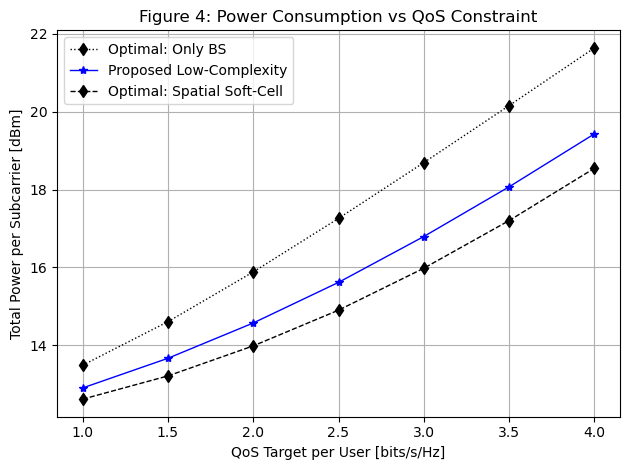

In [33]:
if(analyze):
    # Ortalama alınabilir durumlar belirleniyor (NaN ve aşırı değerler hariç)
    feasible = np.sum(~np.isnan(total_power) & (total_power < 1e6), axis=2)
    # NaN ve aşırı değerler sıfırlanıyor
    totalpower_cleaned = np.where((np.isnan(total_power) | (total_power >= 1e6)), 0, total_power)
    # Ortalama alınarak güç vektörü elde ediliyor
    totalpower_average = np.sum(totalpower_cleaned, axis=2) / feasible

    # Şekil çizimi
    plt.figure()
    plt.plot(QoS_values, 10 * np.log10(totalpower_average[:, 2]), 'kd:', label='Optimal: Only BS', linewidth=1)
    plt.plot(QoS_values, 10 * np.log10(totalpower_average[:, 1]), 'b*-', label='Proposed Low-Complexity', linewidth=1)
    plt.plot(QoS_values, 10 * np.log10(totalpower_average[:, 0]), 'kd--', label='Optimal: Spatial Soft-Cell', linewidth=1)

    plt.xlabel('QoS Target per User [bits/s/Hz]')
    plt.ylabel('Total Power per Subcarrier [dBm]')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title('Figure 4: Power Consumption vs QoS Constraint')
    plt.tight_layout()
    plt.show()
else:
    data_fig4 = scipy.io.loadmat("massive-MIMO-small-cells-master/figure4.mat")
    totalpower_average = data_fig4["totalpower_average"]

    plt.figure()
    plt.plot(QoS_values, 10 * np.log10(totalpower_average[:, 2]), 'kd:', label='Optimal: Only BS', linewidth=1)
    plt.plot(QoS_values, 10 * np.log10(totalpower_average[:, 1]), 'b*-', label='Proposed Low-Complexity', linewidth=1)
    plt.plot(QoS_values, 10 * np.log10(totalpower_average[:, 0]), 'kd--', label='Optimal: Spatial Soft-Cell', linewidth=1)

    plt.xlabel('QoS Target per User [bits/s/Hz]')
    plt.ylabel('Total Power per Subcarrier [dBm]')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title('Figure 4: Power Consumption vs QoS Constraint')
    plt.tight_layout()
    plt.show()

# 🧠 Reinforcement Learning (RL): Temel Kavramlar ve Uygulama Senaryoları

#### 📌 RL Nedir?

**Reinforcement Learning (Pekiştirmeli Öğrenme)**, bir yapay zekâ (ajan)'ın bir ortamda deneyerek **öğrenmesi** prensibine dayanır. Ajan şu şekilde çalışır:

- Bir ortamda **bir eylem (action)** seçer.
- Ortam, ajanı **bir durum (state)** ile karşılaştırır ve buna göre **ödül (reward)** verir.
- Ajan, ödülü en üst düzeye çıkarmak için zamanla **en iyi stratejiyi** öğrenmeye çalışır.

📦 Örnek:
- Bir robot labirentte çıkışı bulmaya çalışıyor.
- Her adımda ödül alıyor (örneğin çıkışa yaklaşırsa pozitif, duvara çarparsa negatif).
- Zamanla, en kısa yolu öğreniyor.

---

#### 🔁 RL ile Supervised Learning Arasındaki Farklar

| Özellik                     | Supervised Learning (Denetimli)        | Reinforcement Learning (Pekiştirmeli)       |
|----------------------------|-----------------------------------------|---------------------------------------------|
| Eğitim Verisi              | Etiketli veriler (X, Y çiftleri)        | Etiketli veri yok; ajan deneme-yanılma yapar|
| Amaç                       | Doğru tahmin yapmak                     | Maksimum ödül kazandıran stratejiyi bulmak  |
| Geri Bildirim              | Anında doğru/yanlış geri bildirim       | Her eylem sonrası ödül (gecikmeli de olabilir)|
| Uygulama Alanları          | Görüntü, metin, sınıflandırma, regresyon| Oyunlar, robotik, otonom araçlar, planlama  |

---

#### 🔧 RL ile Optimizasyon Problemlerine Yaklaşım

RL, klasik optimizasyon tekniklerinden farklı olarak **modelleme gerektirmeyen** ve çevre ile **etkileşim üzerinden çözüm arayan** bir yaklaşımdır. Özellikle:

- Problem hakkında tam bilgi olmadığında
- Çok boyutlu ve sürekli kararlar gerektiğinde
- Ortam değişkense (dinamik sistemler)

📈 RL ajanı, zamanla **en az enerji tüketen**, **maksimum hizmet kalitesi sağlayan**, ya da **en düşük gecikmeli** çözümleri öğrenebilir.

---

#### 📡 Bu Makaledeki Beamforming Problemi ile İlişkisi

Makalede üç beamforming yöntemi tanımlanmıştır:

1. **Optimal Soft-Cell Coordination**  
   – Yüksek hesaplama maliyetli, CVX ile çözülür.

2. **Proposed Low-Complexity Beamforming (Multiflow-RZF)**  
   – Daha hızlı, ama suboptimal.

3. **Only Macro BS Beamforming**  
   – Tüm yük BS üzerinde, SCA'lar pasif.

🧠 **RL Tabanlı Yeni Bir Yöntem Nasıl Eklenebilir?**

RL burada şu şekilde dördüncü bir yöntem olarak eklenebilir:

- **Ajan**: Beamforming kararlarını veren RL modeli.
- **Ortam**: Kullanıcı konumları, kanal koşulları, QoS hedefleri.
- **Eylem (Action)**: Her kullanıcıya atanacak beamforming vektörleri (veya hangi anten tarafından hizmet alacağı).
- **Durum (State)**: Anlık kanal matrisi, kullanıcı yerleşimi, geçmiş servis kararları.
- **Ödül (Reward)**: Toplam güç tüketimi (negatif), QoS karşılanması (pozitif).

Ajan, çok sayıda senaryo üzerinde eğitilerek **toplam güç tüketimini azaltan** ve **QoS gereksinimlerini karşılayan** bir beamforming politikası öğrenebilir.

---

#### ✅ Avantajları ve Potansiyeli

- 🔄 **Çevrim içi öğrenme** ile ortam değişkenliğine uyum sağlayabilir.
- 💡 Karmaşık optimizasyon fonksiyonlarını yaklaşık olarak öğrenebilir.
- ⚙️ Hesaplama yükünü CVX gibi çözümleyicilere göre düşürebilir.

📌 RL tabanlı bu dördüncü beamforming yaklaşımı, gelecekte enerji verimliliği odaklı 5G/6G sistemleri için pratik ve öğrenebilen çözümler sunma potansiyeline sahiptir.


## 🔍 Reinforcement Learning (RL) Yöntemleri: Hangisi Ne İçin Uygun?

RL dünyasında kullanılan başlıca algoritmalar iki ana kategoriye ayrılır:

---

### 1. **Value-Based Methods (Değer Temelli)**

Bu yöntemler her durum-eylem çifti için bir değer (Q-value) öğrenir ve bu değere göre karar verir.

#### 📌 Q-Learning
- **Amaç**: Her (state, action) çifti için `Q(s, a)` değeri öğrenmek.
- **Karar Mekanizması**: Maksimum Q değeri veren aksiyon seçilir.
- **Kısıtları**:
  - Eylem uzayı sınırlı olmalı (örn. "anten 1 mi, 2 mi?").
  - Sürekli aksiyon alanlarında **doğrudan uygulanamaz**.

> 🧠 **Beamforming gibi sürekli değerli (örneğin güç veya beam vektörü gibi) aksiyonlarda kullanılmaz.**

#### 📌 Deep Q-Networks (DQN)
- Q-Tablosu yerine bir **sinir ağı** Q değerini tahmin eder.
- Görsel verilerde (örn. Atari oyunları) çok başarılı.

> ❗ Sürekli aksiyon uzayı olan sistemlerde sınırlıdır. Beamforming için uygun değil.

---

### 2. **Policy-Based Methods (Politika Temelli)**

Ajan doğrudan bir politika (`π(a|s)`) öğrenir, yani duruma göre hangi aksiyonu ne olasılıkla seçeceğini.

#### 📌 REINFORCE (Monte Carlo Policy Gradient)
- Eylemler için olasılık dağılımı öğrenilir.
- Geri besleme tüm epizot sonunda alınır.

> Uygulanabilir ama örnek verimliliği düşüktür.

#### 📌 Actor-Critic Methods
- **Actor**: Politikayı öğrenir.
- **Critic**: O politikaya göre “ne kadar iyi?” değerini hesaplar (Value function).
- Sürekli aksiyonlar için uygundur.

> 🎯 **Beamforming gibi sürekli aksiyon uzayına sahip enerji optimizasyon problemleri için en uygun yöntemdir.**

---

### 3. **Model-Free vs Model-Based RL**

- **Model-Free**: Ortamın dinamiği bilinmeden (örn. kanal modeli) sadece deneyerek öğrenilir.
  - Örn: Q-Learning, Policy Gradient, DDPG
- **Model-Based**: Ortamın geçiş olasılıkları öğrenilir veya tahmin edilir.

> Bu problemde kanal modeli bilinse de değişken olduğu için **model-free** yöntemler daha pratik.

---

### 4. **Deterministic Policy Gradient (DDPG) ve türevleri**

#### 📌 DDPG (Deep Deterministic Policy Gradient)
- **Actor-Critic mimarisine sahiptir**.
- Sürekli aksiyon uzayı için uygundur (örn. beamforming vektörleri).
- Politika deterministik (her duruma 1 aksiyon).
- Replay buffer ve target network içerir (kararlılık için).

#### 📌 TD3 (Twin Delayed DDPG)
- DDPG’nin daha sağlam versiyonudur.
- Daha az aşırı tahminleme yapar.

#### 📌 SAC (Soft Actor-Critic)
- Entropi temelli politika ile keşfi teşvik eder.
- Aksiyon seçimi sırasında rastgeleliği denetler.

---

## 🧪 Bu Beamforming Problemi İçin En Uygun RL Yöntemi

| Gereksinim                              | Karşılayan Yöntem     |
|----------------------------------------|------------------------|
| Sürekli aksiyon uzayı (güç, beam vektörleri) | ✅ DDPG / TD3 / SAC     |
| Enerji minimizasyonu gibi optimizasyon hedefi | ✅ Actor-Critic mimarisi |
| Yüksek boyutlu kanal durumları         | ✅ Deep RL (sinir ağı)  |
| Gerçek zamanlı öğrenme potansiyeli     | ✅ Off-policy yöntemler |

### ✅ Önerilen Yöntem: **TD3** veya **SAC**

- TD3: Kararlı, deterministik ve yüksek örnek verimliliğine sahip.
- SAC: Keşif kapasitesi yüksek, daha “entropik” çözümler.

---

## 📌 Sonuç: RL ile Dördüncü Beamforming Yöntemi

- RL ajanı, farklı kanal durumlarında ve QoS seviyelerinde eğitilerek, beamforming kararlarını minimum toplam güçle sağlamayı öğrenir.
- Bu yöntem, zamanla:
  - Optimal çözüme yaklaşabilir (ama çok daha hızlı çalışır),
  - Karmaşık optimizasyon rutinlerine olan ihtiyacı azaltabilir,
  - Yeni durumlara daha iyi genelleme yapabilir.

> Bu RL tabanlı beamforming yöntemi, diğer 3 yönteme kıyasla **öğrenen**, **genellenebilir** ve **hesaplama açısından daha hızlı** bir alternatif sunar.
